In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
dataset = pd.read_csv("classification.csv")
dataset.head()

,x1,x2,label
0,0.448196,0.130705,0.0
1,0.773273,0.086142,0.0
2,0.418814,0.634072,1.0
3,0.951985,0.403000,0.0
4,0.628209,0.040618,0.0


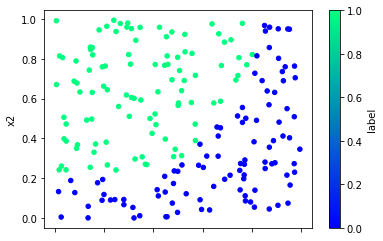

In [4]:
dataset.plot.scatter(x='x1',y='x2', c='label', colormap='winter')

In [5]:
from sklearn.linear_model import LogisticRegression

X = dataset[['x1', 'x2']].values
y = dataset[['label']].values

In [7]:
print(y[:5])
y = y.ravel()
print(y[:5])

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]
[0. 0. 1. 0. 0.]


In [8]:
log = LogisticRegression()
log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = log.predict(X)

In [10]:
y_pred

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.])

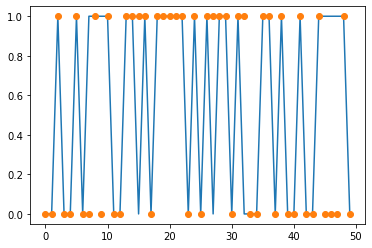

In [13]:
n = 50
plt.plot(y[:n])
plt.plot(y_pred[:n], 'o')
plt.show()

In [14]:
print(log.coef_, log.intercept_)

[[-4.10749984  3.97795939]] [0.15829959]


In [16]:
s = log.score(X, y)
s

0.865

### Régression logistique

$$y = b + x_1w_1 + x_2w_2$$

$$s(y) = \frac{1}{1+e^{-y}}$$

---
### Limite de décision
$$0 = b + x_1w_1 + x_2w_2$$

$$x_2 = \frac{-(b + w_1x_1)}{w_2}$$

In [20]:
b = log.intercept_[0]
w1 = log.coef_[0, 0]
w2 = log.coef_[0, 1]

x1 = X[:, 0]
x2 = -(b+w1*x1)/w2
x2[:10]

array([0.4229972 , 0.7586601 , 0.39265858, 0.94319169, 0.60887228,
       0.21717081, 0.75325401, 0.45831918, 0.73146906, 0.34595622])

In [22]:
x_pos = np.array([[x[0], x[1]] for x in dataset.values if x[2] >= 0.5]) 
x_neg = np.array([[x[0], x[1]] for x in dataset.values if x[2] <= 0.5])

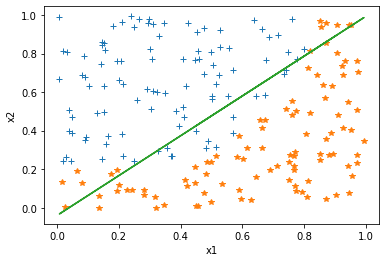

In [24]:
plt.plot(x_pos[:, 0], x_pos[:, 1], '+')
plt.plot(x_neg[:, 0], x_neg[:, 1], '*')
plt.plot(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

[1.]


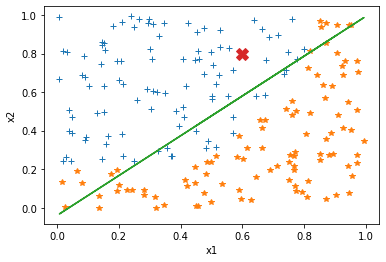

In [33]:
x_test = [0.6, 0.8]
y_pred = log.predict([[x_test[0], x_test[1]]])
print(y_pred)

plt.plot(x_pos[:, 0], x_pos[:, 1], '+')
plt.plot(x_neg[:, 0], x_neg[:, 1], '*')
plt.plot(x1, x2)
plt.plot(x_test[0], x_test[1], 'X', markersize=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()